
## Selecting the right threshold value using ROC Curve - Multiple Algo check

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
X,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [6]:
X.shape #independent variables

(2000, 20)

In [11]:
y.shape #dependent variable

(2000,)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Finding the value of AUC Score using Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

rf_model.fit(X_train,y_train)

y_test_pred=rf_model.predict_proba(X_test)
y_train_pred=rf_model.predict_proba(X_train)

train_score=roc_auc_score(y_train,y_train_pred[:,1])
print("Random Forest ROC-AUC Score on Train Data is {}".format(train_score))

test_score=roc_auc_score(y_test,y_test_pred[:,1])
print("Random Forest ROC-AUC Score on Test Data is {}".format(test_score))

Random Forest ROC-AUC Score on Train Data is 1.0
Random Forest ROC-AUC Score on Test Data is 0.9828222222222222


## Finding the value of AUC Score using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model.fit(X_train,y_train)

y_train_pred=lr_model.predict_proba(X_train)
y_test_pred=lr_model.predict_proba(X_test)

train_score=roc_auc_score(y_train,y_train_pred[:,1])
test_score=roc_auc_score(y_test,y_test_pred[:,1])

print('ROC AUC Score obtained by Logisctic Regression on Training Data is {}'.format(train_score))
print('ROC AUC Score obtained by Logisctic Regression on Testing Data is {}'.format(test_score))

ROC AUC Score obtained by Logisctic Regression on Training Data is 0.9863568922694498
ROC AUC Score obtained by Logisctic Regression on Testing Data is 0.9885777777777777


## Finding the value of AUC Score using Adaboost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ab_model=AdaBoostClassifier()

ab_model.fit(X_train,y_train)

y_train_pred=ab_model.predict_proba(X_train)
y_test_pred=ab_model.predict_proba(X_test)

train_score=roc_auc_score(y_train,y_train_pred[:,1])
test_score=roc_auc_score(y_test,y_test_pred[:,1])

print('ROC - AUC Score obtained by Adaboost on training data is {}'.format(train_score))
print('ROC - AUC Score obtained by Adaboost on testing data is {}'.format(test_score))



ROC - AUC Score obtained by Adaboost on training data is 0.9975081174960356
ROC - AUC Score obtained by Adaboost on testing data is 0.9826111111111111


## Finding the value of AUC Score using KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
kn_model=KNeighborsClassifier()

kn_model.fit(X_train,y_train)

y_train_pred=kn_model.predict_proba(X_train)
y_test_pred=kn_model.predict_proba(X_test)

train_score=roc_auc_score(y_train,y_train_pred[:,1])
test_score=roc_auc_score(y_test,y_test_pred[:,1])

print('ROC - AUC Score obtained by KNN on training data is {}'.format(train_score))
print('ROC - AUC Score obtained by KNN on testing data is {}'.format(test_score))



ROC - AUC Score obtained by KNN on training data is 0.981670071491109
ROC - AUC Score obtained by KNN on testing data is 0.9426111111111111


## Finding the mean of scores obtained from all the above models

In [53]:
pred=[]
for models in [rf_model,lr_model,ab_model,kn_model]:
    pred.append(pd.DataFrame(models.predict_proba(X_test)[:,1]))

In [54]:
pred

[        0
 0    0.99
 1    0.00
 2    0.94
 3    0.94
 4    0.52
 ..    ...
 595  0.00
 596  0.02
 597  1.00
 598  0.02
 599  0.99
 
 [600 rows x 1 columns],
             0
 0    0.991861
 1    0.000008
 2    0.966929
 3    0.761539
 4    0.779443
 ..        ...
 595  0.024239
 596  0.000003
 597  0.984385
 598  0.001147
 599  0.989540
 
 [600 rows x 1 columns],
             0
 0    0.559186
 1    0.463282
 2    0.538202
 3    0.509875
 4    0.490344
 ..        ...
 595  0.461121
 596  0.441377
 597  0.532403
 598  0.441720
 599  0.559890
 
 [600 rows x 1 columns],
        0
 0    1.0
 1    0.0
 2    0.8
 3    0.8
 4    0.4
 ..   ...
 595  0.0
 596  0.0
 597  1.0
 598  0.2
 599  0.8
 
 [600 rows x 1 columns]]

In [59]:
final_pred=pd.concat(pred,axis=1).mean(axis=1)#Concatinating the above dataframes by columns and then calculating the mean across column(left to right)

In [63]:
print('Ensemble test ROC-AUC Score is {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test ROC-AUC Score is 0.9852666666666666


In [64]:
final_pred

0      0.885262
1      0.115823
2      0.811283
3      0.752853
4      0.547447
         ...   
595    0.121340
596    0.115345
597    0.879197
598    0.165717
599    0.834857
Length: 600, dtype: float64

## Calculating the ROC Curve values

In [65]:
fpr,tpr,thresholds=roc_curve(y_test,final_pred)

In [68]:
thresholds

array([1.91188114, 0.91188114, 0.90172166, 0.90077475, 0.79580575,
       0.79162833, 0.79097738, 0.7905558 , 0.78627646, 0.78571156,
       0.77299847, 0.77037124, 0.75015102, 0.74887362, 0.71425756,
       0.71393711, 0.68506113, 0.68243537, 0.60529968, 0.59550386,
       0.58077749, 0.57675354, 0.56995356, 0.56864346, 0.54744674,
       0.52627948, 0.52615858, 0.50366892, 0.4471034 , 0.40318654,
       0.39629719, 0.34562235, 0.34336612, 0.24349466, 0.24140421,
       0.22146234, 0.21896893, 0.21102808, 0.20848417, 0.13333353,
       0.1328351 , 0.10498954])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thr in thresholds:
    y_pred=np.where(final_pred>thr,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
df=pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
df.columns=['Threshold','Accuracy Score']
df.sort_values(by='Accuracy Score',ascending=False, inplace=True)

In [85]:
df

,Threshold,Accuracy Score
28,0.447103,0.961667
24,0.547447,0.960000
27,0.503669,0.958333
25,0.526279,0.958333
23,0.568643,0.958333
26,0.526159,0.956667
22,0.569954,0.956667
29,0.403187,0.953333
21,0.576754,0.951667
30,0.396297,0.951667


# Plotting the ROC Curve

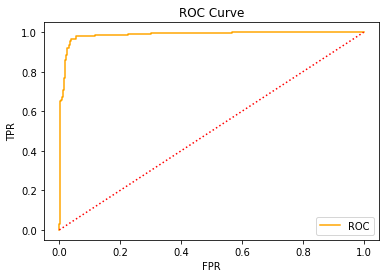

In [97]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1], color='red', linestyle=':')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()